1. PROJECT NAME:- EXPLORATORY DATA ANALYSIS OF AMAZON PRIME VIDEOS CONTENT LIBRARY

2. PROJECT SUMMARY

    This project analyses the Amazon Prime Video library to understand patterns and trends in content type, age certification, content ratings and more.

    The dataset contains metadata on shows and movies from 1912 to 2022, including features such as runtime, genres, production countries, their type and ratings.

    The methods used for analysis:
    - Data cleaning.
    - Grouping and binning data.
    - EDA using various visualisation techniques.

    Limitations:
    - Many shows/movies did not have any entries of age certification which could have been useful if present.

    Key Findings:
    - Demand for movies is greater than shows.
    - R-rated and PG-13-rated contents are very popular in this platform.
    - The average rating of shows (as per IMDb and TMDB scores) are better than movies.
    - Demand for English language based content is higher.

3. PROBLEM STATEMENT

    *This dataset contains shows and movies avalilable on Amazon Prime allowing us to analyse and extract valuable insights as mentioned below:*

    Content Diversity: Various categories of movies and shows can be found on Amazon Prime. So understanding what genres are watched by the viewers, the most, is crucial.

    Regional Availability: Understanding the content distribution across different regions.

    Trends over time: Since various people from different parts of the world watch movies and shows on this platform, so understanding how the contents of the library of this platform has altered over time to meet the viewers demands is of great relevance.

    IMDb Ratings and Popularity: Ratings and votes greatly affect the sentiment of the viewers. Many rely on these parameters to choose any particular show or movie to spend time on.

4. DATA WRANGLING

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Storing both the datasets into different variables as a pandas dataframe
df1=pd.read_csv(r'C:\Users\maa\Desktop\PYTHON\My_Projects\EDA of Amazon Prime Videos Library\Amazon Credits.csv')
df2=pd.read_csv(r'C:\Users\maa\Desktop\PYTHON\My_Projects\EDA of Amazon Prime Videos Library\Amazon titles.csv')

In [3]:
# Checking the columns of the first dataset
df1.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [4]:
# Checking the columns of the second dataset
df2.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

Here, we can see that both datasets have a column, common to each ---> 'id'. So we wil merge both the datasets based on this 
common column that they share.

In [5]:
# Merging the datasets and printing the first few rows of the merged data
df=pd.merge(df1,df2,on='id')
df.head()

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,Moe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
2,31461,ts20945,Larry Fine,Larry,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0


In [6]:
# Checking the no. of rows and columns of the merged dataset, and the column heads as well
print(df.shape)
print(df.columns)

(124347, 19)
Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')


In [7]:
# Dataset Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124347 non-null  int64  
 1   id                    124347 non-null  object 
 2   name                  124347 non-null  object 
 3   character             108040 non-null  object 
 4   role                  124347 non-null  object 
 5   title                 124347 non-null  object 
 6   type                  124347 non-null  object 
 7   description           124256 non-null  object 
 8   release_year          124347 non-null  int64  
 9   age_certification     56735 non-null   object 
 10  runtime               124347 non-null  int64  
 11  genres                124347 non-null  object 
 12  production_countries  124347 non-null  object 
 13  seasons               8153 non-null    float64
 14  imdb_id               119044 non-null  object 
 15  

In [8]:
# Checking the number of duplicate rows in the dataset
df.duplicated().sum()

np.int64(168)

In [9]:
# Removing the duplicate rows from the dataset
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [10]:
# Checking the columns containing null values
df.isnull().sum()

person_id                    0
id                           0
name                         0
character                16277
role                         0
title                        0
type                         0
description                 91
release_year                 0
age_certification        67444
runtime                      0
genres                       0
production_countries         0
seasons                 116026
imdb_id                   5303
imdb_score                6051
imdb_votes                6075
tmdb_popularity             15
tmdb_score               10169
dtype: int64

In [11]:
# Replacing the null values of character column with 'unknown'
df['character'].fillna('unknown',inplace=True)
df.isnull().sum()

person_id                    0
id                           0
name                         0
character                    0
role                         0
title                        0
type                         0
description                 91
release_year                 0
age_certification        67444
runtime                      0
genres                       0
production_countries         0
seasons                 116026
imdb_id                   5303
imdb_score                6051
imdb_votes                6075
tmdb_popularity             15
tmdb_score               10169
dtype: int64

Now, we will be removing the description column from the dataset, because the data of this column won't be necessary to
to make any analysis.

In [12]:
# Omitting the description column
df=df.drop(columns='description')
df.isnull().sum()

person_id                    0
id                           0
name                         0
character                    0
role                         0
title                        0
type                         0
release_year                 0
age_certification        67444
runtime                      0
genres                       0
production_countries         0
seasons                 116026
imdb_id                   5303
imdb_score                6051
imdb_votes                6075
tmdb_popularity             15
tmdb_score               10169
dtype: int64

Age certification of movies/shows began globally in the year of 1968, while in India it was in the year of 1952.
The only certification being provided to movies/shows globally at that time was 'Approved' and most movies/shows in India at the time were 
rated 'Unrestricted'. So, we will be replacing the null values of age certification for movies/shows before 1968 with
'Approved/Unrestricted'.

In [13]:
# Replacing blanks with 'Approved/Unrestricted' in age certification column for movies released before 1968
df.loc[(df['age_certification'].isna()) & (df['release_year']<1968),'age_certification']='Approved/Unrestricted'
df.isnull().sum()

person_id                    0
id                           0
name                         0
character                    0
role                         0
title                        0
type                         0
release_year                 0
age_certification        47241
runtime                      0
genres                       0
production_countries         0
seasons                 116026
imdb_id                   5303
imdb_score                6051
imdb_votes                6075
tmdb_popularity             15
tmdb_score               10169
dtype: int64

In [14]:
# Replacing the remaining null values of age certification with 'No rating'
df['age_certification'].fillna('No rating',inplace=True)
df.isnull().sum()

person_id                    0
id                           0
name                         0
character                    0
role                         0
title                        0
type                         0
release_year                 0
age_certification            0
runtime                      0
genres                       0
production_countries         0
seasons                 116026
imdb_id                   5303
imdb_score                6051
imdb_votes                6075
tmdb_popularity             15
tmdb_score               10169
dtype: int64

The blanks in the column of seasons denote that these are the rows containing the details of movies,
and movies have no seasons.
So, we will be replacing the blanks with 0.

In [15]:
# Replacing the blanks in seasons column with 0
df['seasons'].fillna(0,inplace=True)
df.isnull().sum()

person_id                   0
id                          0
name                        0
character                   0
role                        0
title                       0
type                        0
release_year                0
age_certification           0
runtime                     0
genres                      0
production_countries        0
seasons                     0
imdb_id                  5303
imdb_score               6051
imdb_votes               6075
tmdb_popularity            15
tmdb_score              10169
dtype: int64

Now, we will be removing the column of imdb_id as it serves no purpose for analysing the dataset and it also has a large number of blank rows.

In [16]:
# Omitting the imdb_id column
df=df.drop('imdb_id',axis=1)
df.isnull().sum()

person_id                   0
id                          0
name                        0
character                   0
role                        0
title                       0
type                        0
release_year                0
age_certification           0
runtime                     0
genres                      0
production_countries        0
seasons                     0
imdb_score               6051
imdb_votes               6075
tmdb_popularity            15
tmdb_score              10169
dtype: int64

We will not make any changes to the blanks in the column of IMDb score because making any changes to them such as removing those rows or replacing them with their mean values would result in incorrect analysis.
We will also keep the columns of IMDb votes, TMDB popularity and TMDB score unchanged for the same reason.

We will check the final shape (number of rows and columns) of the dataset and the columns before moving on to visualisation.

In [17]:
print(df.shape)
print(df.columns)

(124179, 17)
Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score'],
      dtype='object')


6. Data Visualisation

i. Distribution of Movies and Shows- Pie Chart

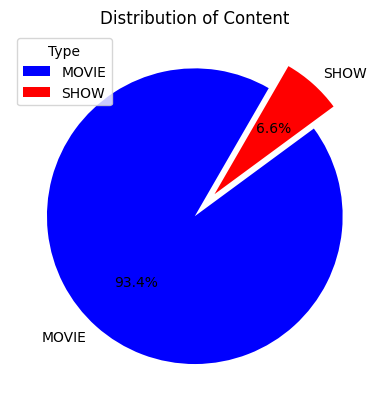

In [18]:
# Plotting a graph to visualise the distribution of movies and shows in the library
plt.pie(df['type'].value_counts().values,labels=df['type'].value_counts().index,colors=['blue','red'],autopct='%1.1f%%',startangle=60,explode=[0,0.2])
plt.legend(title='Type',loc='upper left')
plt.title('Distribution of Content')
plt.show()

Insights:
- The number of movies in the Amazon Prime library is far greater than the number of shows.
- This denotes that the demand for watching movies on the platform is higher than that of shows, which explains the higher number of movies.

ii. Distribution of content as per their release years- Column Graph

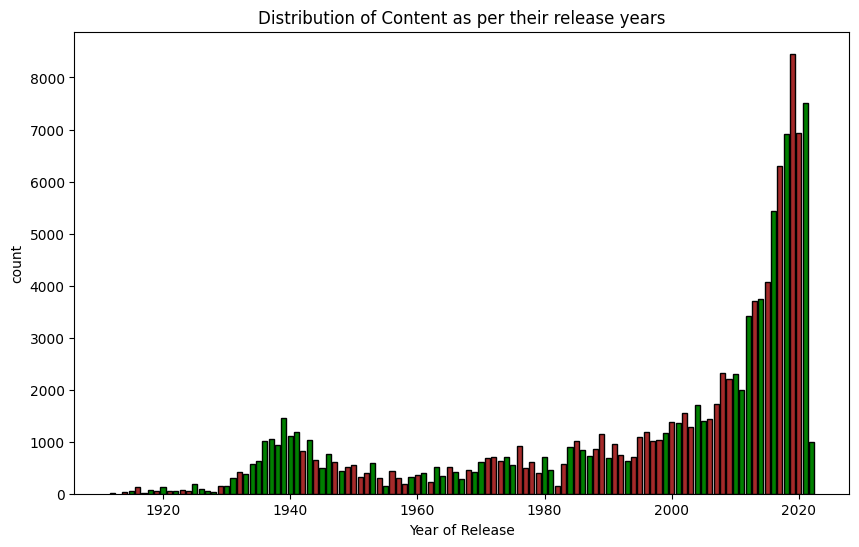

In [19]:
# Plotting a graph to visualise the content distribution as per their release years
plt.figure(figsize=(10,6))
plt.bar(df['release_year'].value_counts().index,df['release_year'].value_counts().values,color=['brown','green'],edgecolor='black')
plt.xlabel('Year of Release')
plt.ylabel('count')
plt.title('Distribution of Content as per their release years')
plt.show()

Insights:
- The movies/shows released in the 21st century dominate the content distribution of the library.

iii. Distribution of Content as per their Age Certification- Column Graph

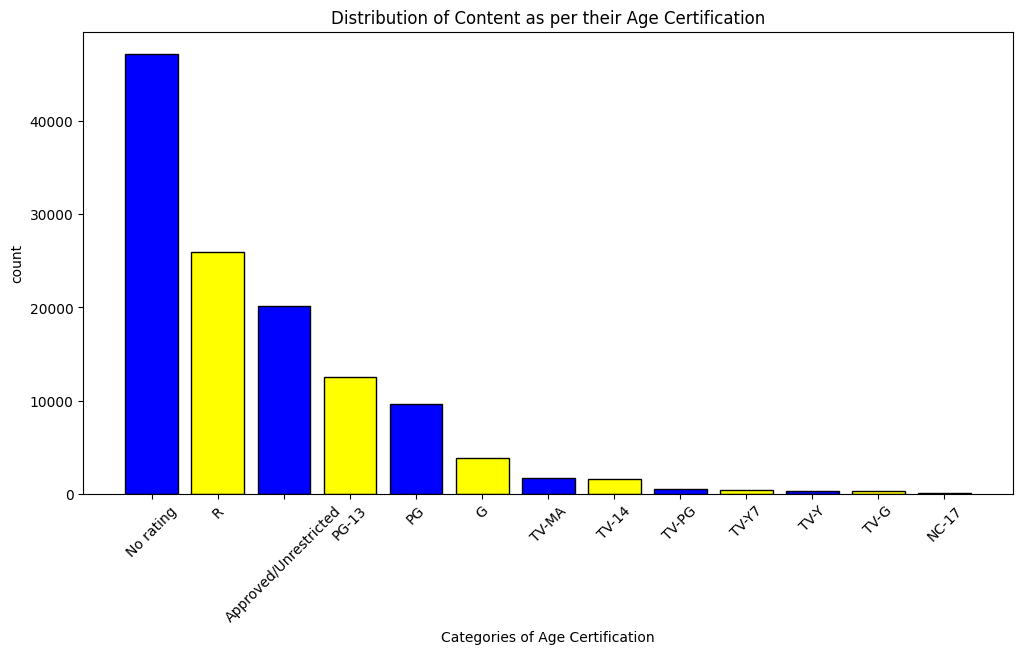

In [20]:
# Plotting a graph to visualise the distribution of content as per their age certification
plt.figure(figsize=(12,6))
plt.bar(df['age_certification'].value_counts().index,df['age_certification'].value_counts().values,color=['blue','yellow'],edgecolor='black')
plt.xlabel('Categories of Age Certification')
plt.xticks(rotation=45)
plt.ylabel('count')
plt.title('Distribution of Content as per their Age Certification')
plt.show()

Insights:
- Age certification of movies/shows began globally in the year of 1968, while in India it was in the year of 1952.
  The only certification being provided to movies/shows globally at that time was 'Approved' and most movies/shows in India at the time were 
  rated 'Unrestricted'.
- The column of 'No rating' shows the number of movies/shows not having any age certification mentioned in the dataset,
  even though they were released from  1968 and onwards.
- The number of unrated movies/shows is higher than the rest of the categories, making us lose a lot of valuable information
  which could have been utilised to make a better analysis of the dataset.
- Among the movies/shows that are rated, 'R' category has the highest count, showing that a higher population of adults are subscribed to Amazon Prime.
- The movies/shows rated 'Approved/Unrestricted' are the ones that were released before the year of 1968. This is the category with the second highest
  count, showing that a larger portion of viewers are interested in old movies.

iv. Distribution of Runtime of movies- Histogram

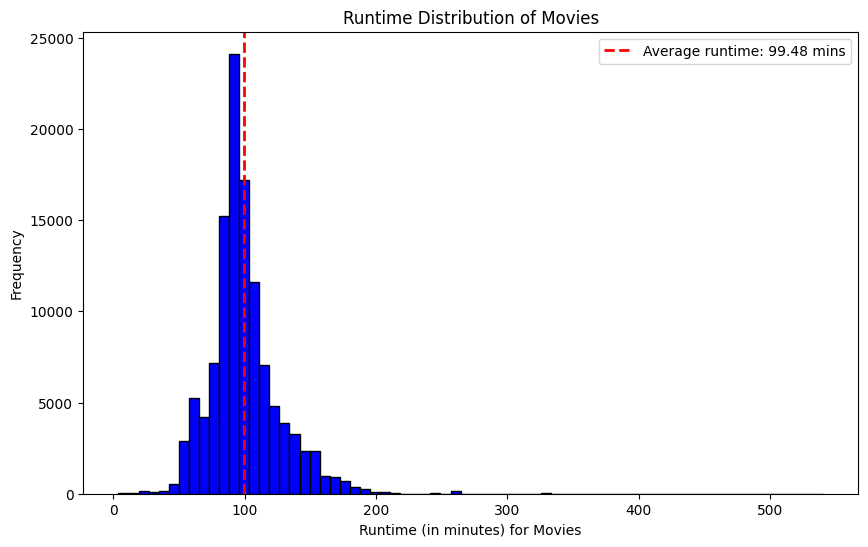

In [21]:
# Storing the value of runtime (in minutes) for only movies
movie_runtime=df[df['type']=='MOVIE']['runtime']

# Plotting the graph to show the distribution of runtime (in minutes) for movies
plt.figure(figsize=(10,6))
plt.hist(movie_runtime,bins=70,color='blue',edgecolor='black')
plt.axvline(movie_runtime.mean(),color='red',linestyle='dashed',linewidth=2,label=f"Average runtime: {movie_runtime.mean():.2f} mins")
plt.xlabel('Runtime (in minutes) for Movies')
plt.legend()
plt.ylabel('Frequency')
plt.title('Runtime Distribution of Movies')
plt.show()

Insights:
- The average runtime for movies is around 1 hour and 40 mins.
- Movies with a runtime of 1 hour and 30 mins have the highest count.

v. Distribution of runtime of shows- Histogram

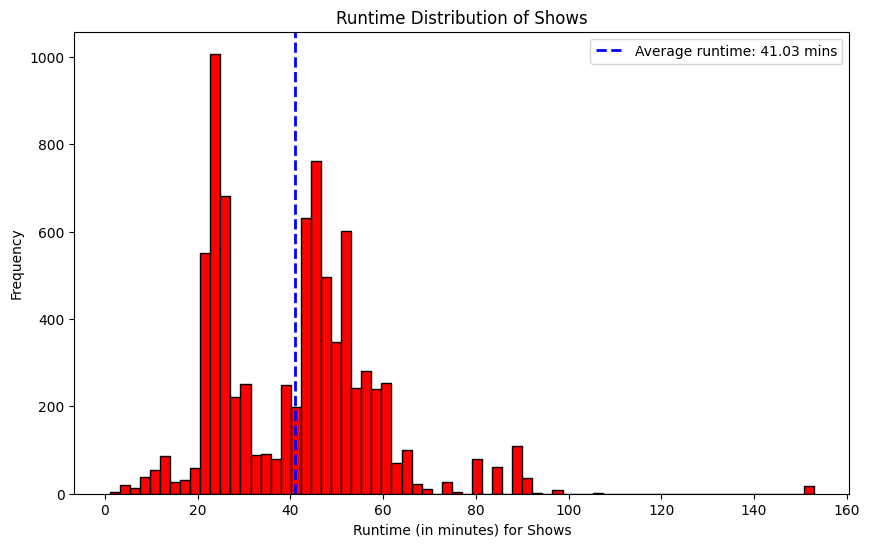

In [22]:
# Storing the value of runtime (in minutes) of only shows
show_runtime=df[df['type']=='SHOW']['runtime']

# Plotting the graph to show the distribution of runtime (in minutes) for movies
plt.figure(figsize=(10,6))
plt.hist(show_runtime,bins=70,color='red',edgecolor='black')
plt.axvline(show_runtime.mean(),color='blue',linestyle='dashed',linewidth=2,label=f"Average runtime: {show_runtime.mean():.2f} mins")
plt.xlabel('Runtime (in minutes) for Shows')
plt.legend()
plt.ylabel('Frequency')
plt.title('Runtime Distribution of Shows')
plt.show()

Insights:
- The average runtime for an episode of a show is 41.03 mins.
- Shows with episodes having a runtime of 20-25 mins have the highest count.

In [23]:
# Since our genre column has data in this format: ['comedy', 'family'], we will store the count of genre in a variable
exploded_genre=df.explode('genres')
count_genre=exploded_genre['genres'].value_counts()
count_genre=count_genre[count_genre>1000]
print(count_genre)

genres
['drama']                         9853
['comedy']                        5582
['drama', 'romance']              2512
['horror']                        2448
['documentation']                 2373
['drama', 'comedy']               1991
['comedy', 'drama']               1986
['thriller']                      1848
['romance', 'comedy']             1622
['comedy', 'romance']             1608
['thriller', 'drama']             1543
['thriller', 'crime', 'drama']    1519
['western']                       1482
['romance', 'drama']              1480
['horror', 'thriller']            1250
['comedy', 'drama', 'romance']    1140
['drama', 'crime']                1117
['drama', 'comedy', 'romance']    1090
['thriller', 'horror']            1003
Name: count, dtype: int64


vi. Distribution of genres- Bar Graph

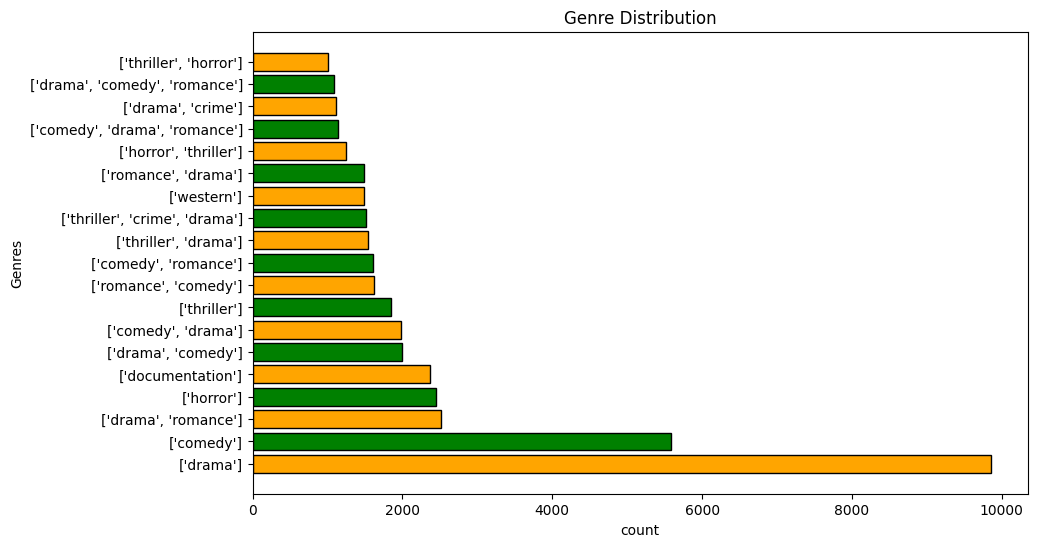

In [24]:
# Plotting a graph to visualise the distribution of genres in the contents of the library
plt.figure(figsize=(10,6))
plt.barh(count_genre.index,count_genre.values,color=['orange','green'],edgecolor='black')
plt.xlabel('count')
plt.ylabel('Genres')
plt.title('Genre Distribution')
plt.show()

Insights:
- We can see that the movies/shows under 'Drama' category dominate the content library, with 'Comedy' being the second highest.

In [25]:
# Before plotting the graph for the distribution of production countries, we will store their count values in a variable
exploded_country=df.explode('production_countries')
country_count=exploded_country['production_countries'].value_counts()
country_count=country_count[country_count>1000]
print(country_count)

production_countries
['US']          69217
['IN']          11176
['GB']           7204
['CA']           3200
[]               2298
['JP']           2114
['AU']           1591
['FR']           1490
['CN']           1238
['GB', 'US']     1229
['CA', 'US']     1175
Name: count, dtype: int64


vii. Distribution of the contents' production country- Bar Graph

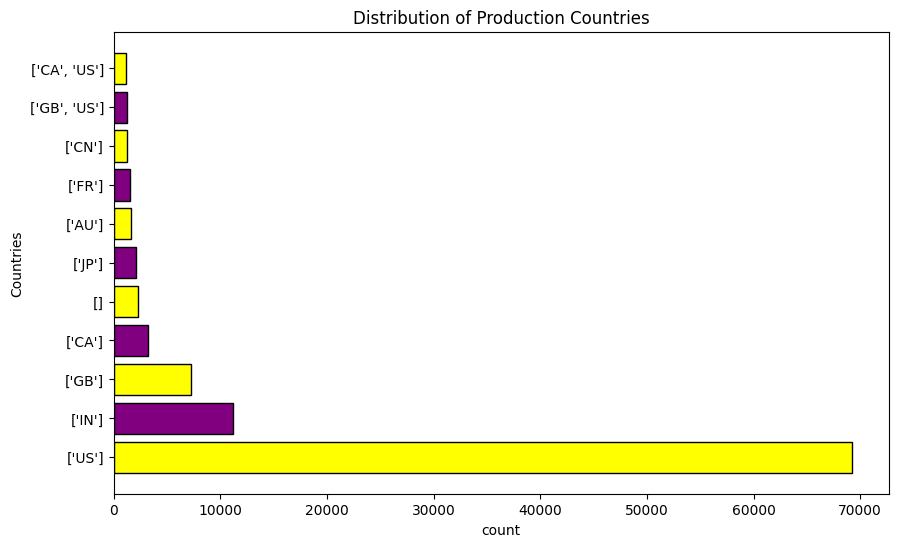

In [26]:
# Plotting a graph to visualise the distribution of production countries of the contents of the library
plt.figure(figsize=(10,6))
plt.barh(country_count.index,country_count.values,color=['yellow','purple'],edgecolor='black')
plt.xlabel('count')
plt.ylabel('Countries')
plt.title('Distribution of Production Countries')
plt.show()

Insights:
- US based content dominate the library, followed by Indian content at second and British content at third position.
- Since US movies/shows dominate the library, this shows that majority of the content is in English language.
- Also, this shows that viewers prefer more english content, that too US based content.

viii. Distribution of number of seasons of shows- Histogram

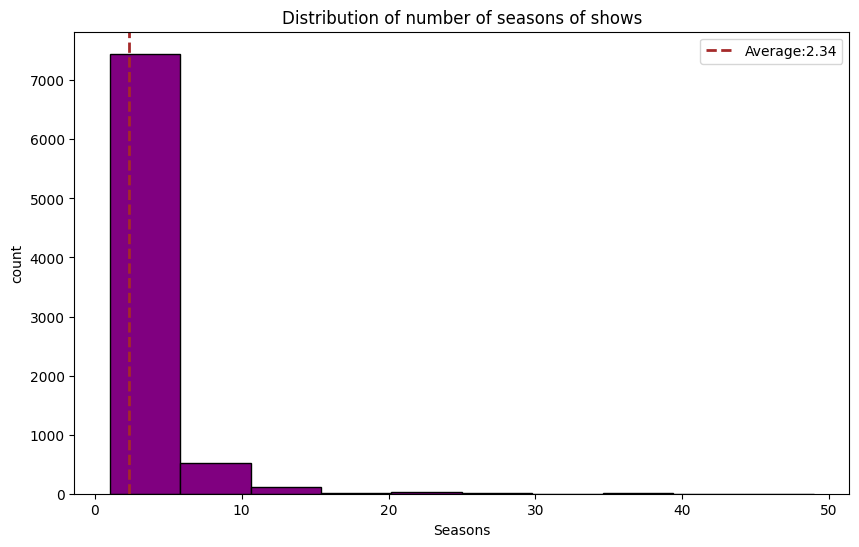

In [27]:
# Storing the count of seasons for only shows since movies don't have seasons
show_seasons=df[df['type']=='SHOW']['seasons']

# Plotting a graph to show the distribution of number of seasons among shows
plt.figure(figsize=(10,6))
plt.hist(show_seasons,color='purple',edgecolor='black')
plt.axvline(show_seasons.mean(),linestyle='dashed',color='brown',linewidth=2,label=f"Average:{show_seasons.mean():.2f}")
plt.xlabel('Seasons')
plt.ylabel('count')
plt.legend()
plt.title('Distribution of number of seasons of shows')
plt.show()

Insights:
- Shows with only 1 season have the highest count.
- The average number of seasons per show is 2.34.

ix. Distribution of IMDb scores for movies- Histogram

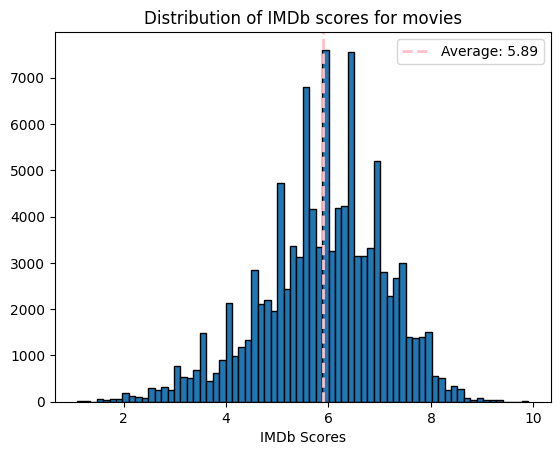

In [28]:
# Plotting a graph to visualise the distribution of IMDb scores of movies
a=df[df['type']=='MOVIE']['imdb_score'].dropna()
plt.hist(a,bins=70,edgecolor='black')
plt.axvline(a.mean(),linestyle='--',linewidth=2,color='pink',label=f"Average: {a.mean():.2f}")
plt.xlabel('IMDb Scores')
plt.title('Distribution of IMDb scores for movies')
plt.legend()
plt.show()

Insights:
- Movies with a rating of around 5.9 have the highest count.
- The average IMDb score for movies is 5.89.

x. Distribution of IMDb scores for shows- Histogram

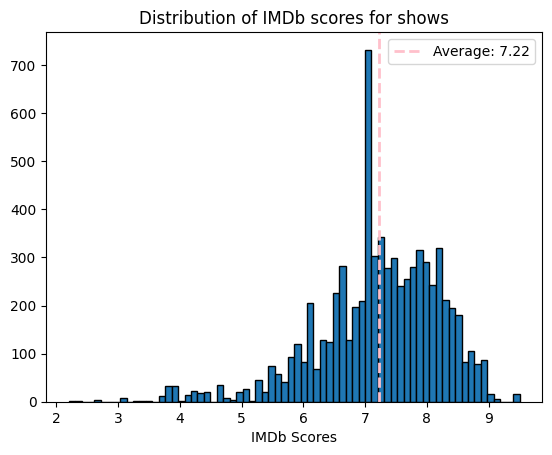

In [29]:
# Plotting a graph to visualise the distribution of IMDb scores of shows
c=df[df['type']=='SHOW']['imdb_score'].dropna()
plt.hist(c,bins=70,edgecolor='black')
plt.axvline(c.mean(),linestyle='--',linewidth=2,color='pink',label=f"Average: {c.mean():.2f}")
plt.xlabel('IMDb Scores')
plt.title('Distribution of IMDb scores for shows')
plt.legend()
plt.show()

Insights:
- Shows with a rating of around 7 have the highest count.
- The average IMDb score for shows is 7.22.

xi. Distribution of TMDB scores for movies- Histogram

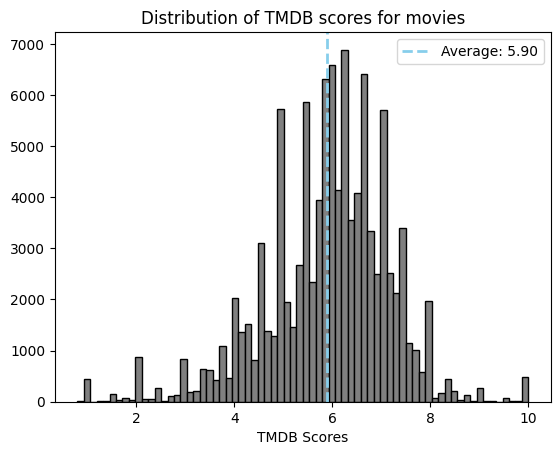

In [30]:
# Plotting a graph to visualise the distribution of TMDB scores of movies
b=df[df['type']=='MOVIE']['tmdb_score'].dropna()
plt.hist(b,bins=70,edgecolor='black',color='gray')
plt.axvline(b.mean(),linestyle='--',linewidth=2,color='skyblue',label=f"Average: {b.mean():.2f}")
plt.xlabel('TMDB Scores')
plt.title('Distribution of TMDB scores for movies')
plt.legend()
plt.show()

Insights:
- The average TMDB score for movies is 5.90.
- Movies rated around 6.2-6.3 have the highest count.

xii. Distribution of TMDB scores for shows- Histogram

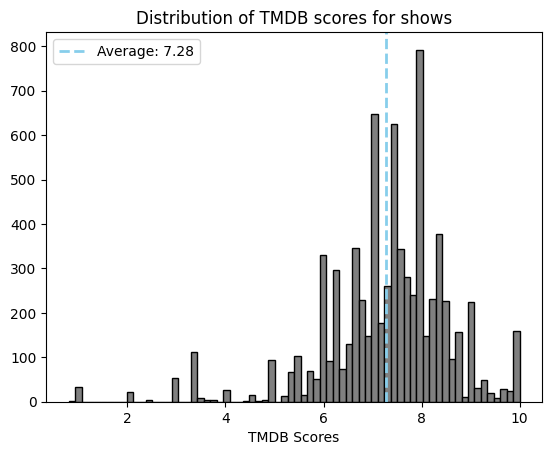

In [31]:
# Plotting a graph to visualise the distribution of TMDB scores of movies
d=df[df['type']=='SHOW']['tmdb_score'].dropna()
plt.hist(d,bins=70,edgecolor='black',color='gray')
plt.axvline(d.mean(),linestyle='--',linewidth=2,color='skyblue',label=f"Average: {d.mean():.2f}")
plt.xlabel('TMDB Scores')
plt.title('Distribution of TMDB scores for shows')
plt.legend()
plt.show()

Insights:
- The average TMDB score for shows is 7.28.
- Shows rated around 7.9-8.0 have the highest count.

xiii. Visualising how runtime of shows have been affected with the passing years- Scatter Plot

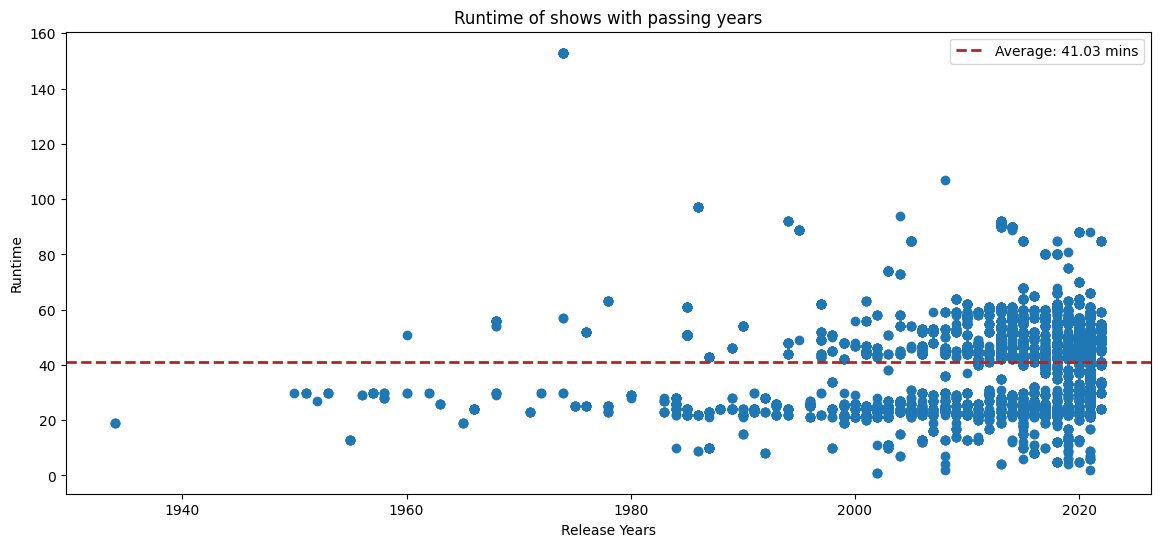

In [32]:
plt.figure(figsize=(14,6))
plt.scatter(df[df['type']=='SHOW']['release_year'],df[df['type']=='SHOW']['runtime'])
plt.axhline(show_runtime.mean(),linewidth=2,linestyle='--',color='brown',label=f"Average: {show_runtime.mean():.2f} mins")
plt.title('Runtime of shows with passing years')
plt.xlabel('Release Years')
plt.ylabel('Runtime')
plt.legend()
plt.show()

Insights:
- The runtime of shows have significantly increased in the past few years.
- The number of shows being released has increased by a huge margin in the past few years.
- More shows have a runtime above the average runtime.

xiv. Visualising how runtime of movies have been affected with the passing years- Scatter Plot

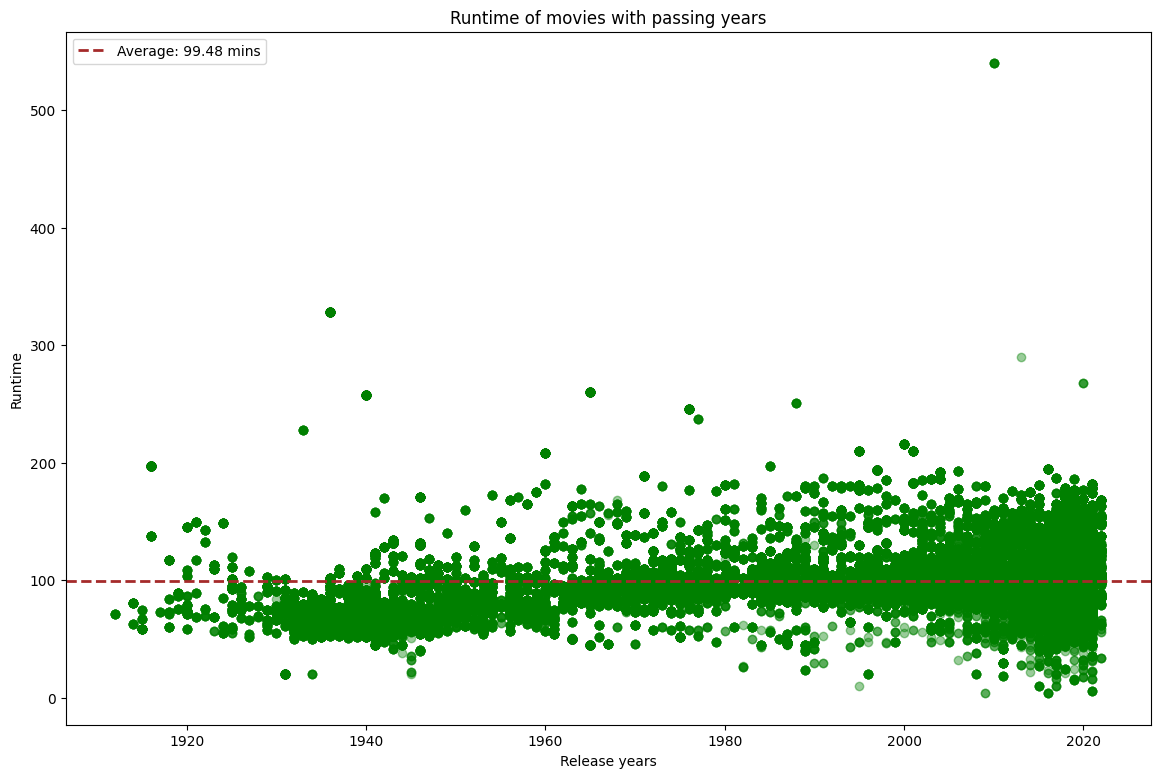

In [33]:
plt.figure(figsize=(14,9))
plt.scatter(df[df['type']=='MOVIE']['release_year'],df[df['type']=='MOVIE']['runtime'],alpha=0.4,color='green')
plt.axhline(movie_runtime.mean(),linewidth=2,linestyle='--',color='brown',label=f"Average: {movie_runtime.mean():.2f} mins")
plt.title('Runtime of movies with passing years')
plt.legend()
plt.xlabel('Release years')
plt.ylabel('Runtime')
plt.show()

Insights:
- We can see that many movies in the past had a runtime lower than the average.
- We can see that there are a lot of short films being released in the past few years.
- Also, more movies have a higher than average runtime in the recent years.

xv. Visualising how movies of each age certification perform based on their IMDb scores- Boxplot

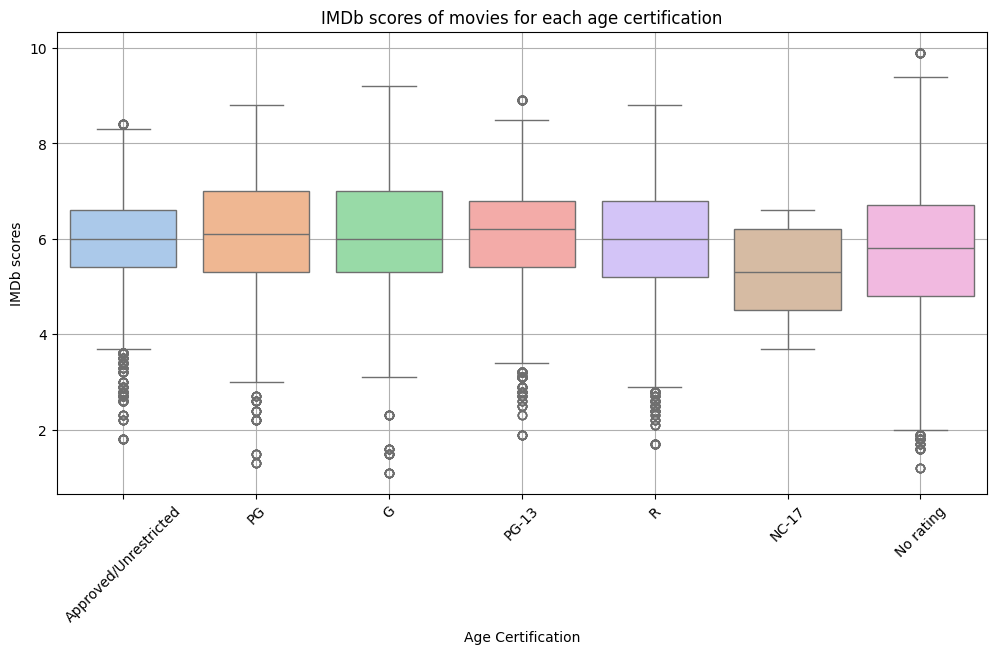

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x=df[df['type']=='MOVIE']['age_certification'],y='imdb_score',palette='pastel')
plt.xlabel('Age Certification')
plt.ylabel('IMDb scores')
plt.grid()
plt.title('IMDb scores of movies for each age certification')
plt.xticks(rotation=45)
plt.show()

Insights:
- Approved/Unrestricted movies have a large number of outliers at the bottom end.
- Movies rated PG performs the best.
- NC-17 rated movies performs the worst.

xvi. Visualising how shows of each age certification perform based on their IMDb scores- Boxplot

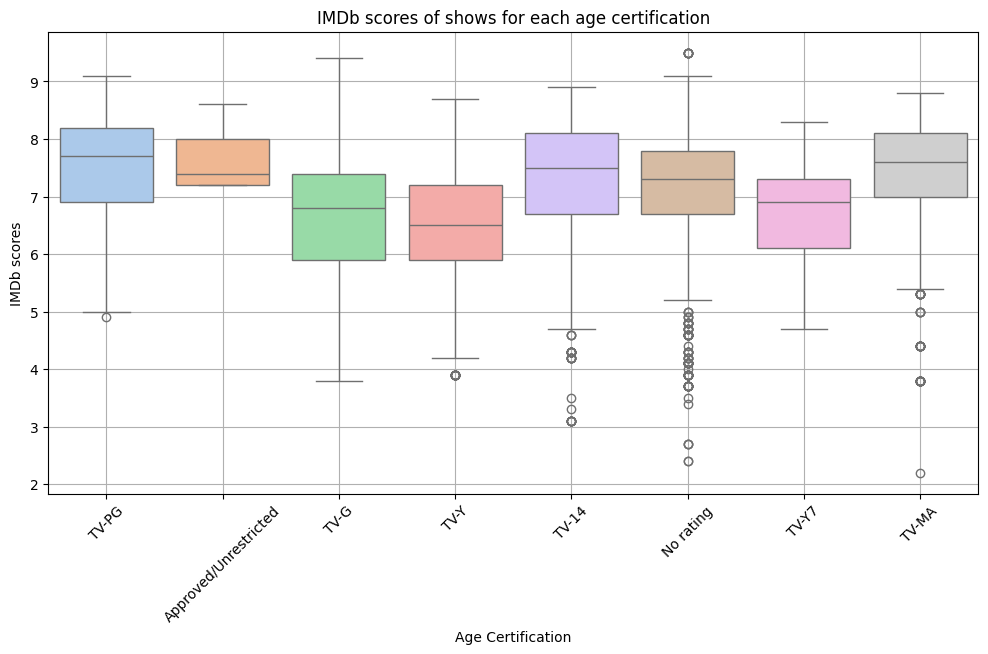

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x=df[df['type']=='SHOW']['age_certification'],y='imdb_score',palette='pastel')
plt.xlabel('Age Certification')
plt.ylabel('IMDb scores')
plt.grid()
plt.title('IMDb scores of shows for each age certification')
plt.xticks(rotation=45)
plt.show()

Insights:
- TV-PG rated shows perform the best, followed by TV-MA rated shows.
- Unrated shows have many outliers at the bottom end.

xvii. Visualising age certification by release years- Countplot

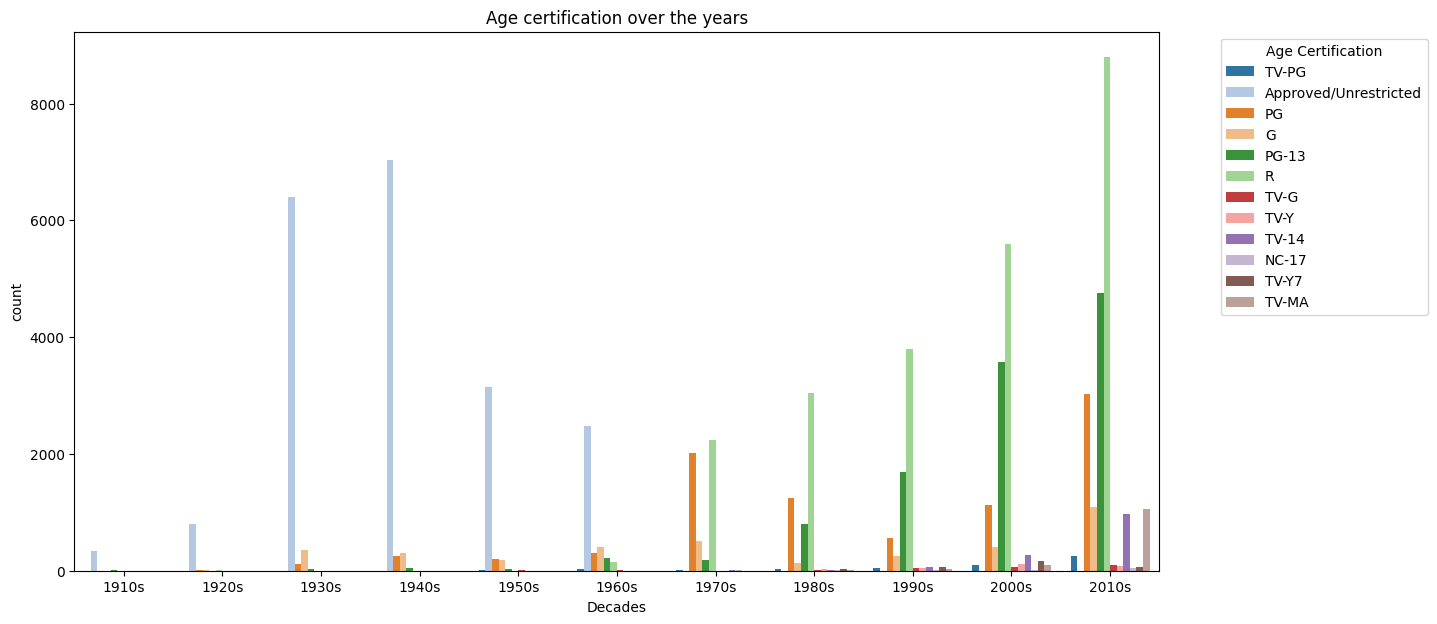

In [36]:
# Grouping the year of release
df_filtered=df[df['age_certification']!='No rating']
bin=range(1910,2030,10)
label=[f"{year}s" for year in range(1910,2020,10)]
df_filtered['decade']=pd.cut(df_filtered['release_year'],bins=bin,labels=label,right=False)

# Plotting the graph
plt.figure(figsize=(14,7))
sns.countplot(data=df_filtered,x='decade',hue='age_certification',palette='tab20')
plt.title('Age certification over the years')
plt.xlabel('Decades')
plt.legend(title='Age Certification',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

Insights:
- R-rated movies/shows have significantly increased since 1960s.
- Approved/Unrestricted-rated movies/shows had the highest count until the 1960s, since a proper age certification system wasn't formed yet.
- We also see a rise in PG-13-rated movies/shows since 1960s.

xviii. Pairplot- This will help us show pairwise relationships beteween multiple numerical features in the dataset along with their distribution.

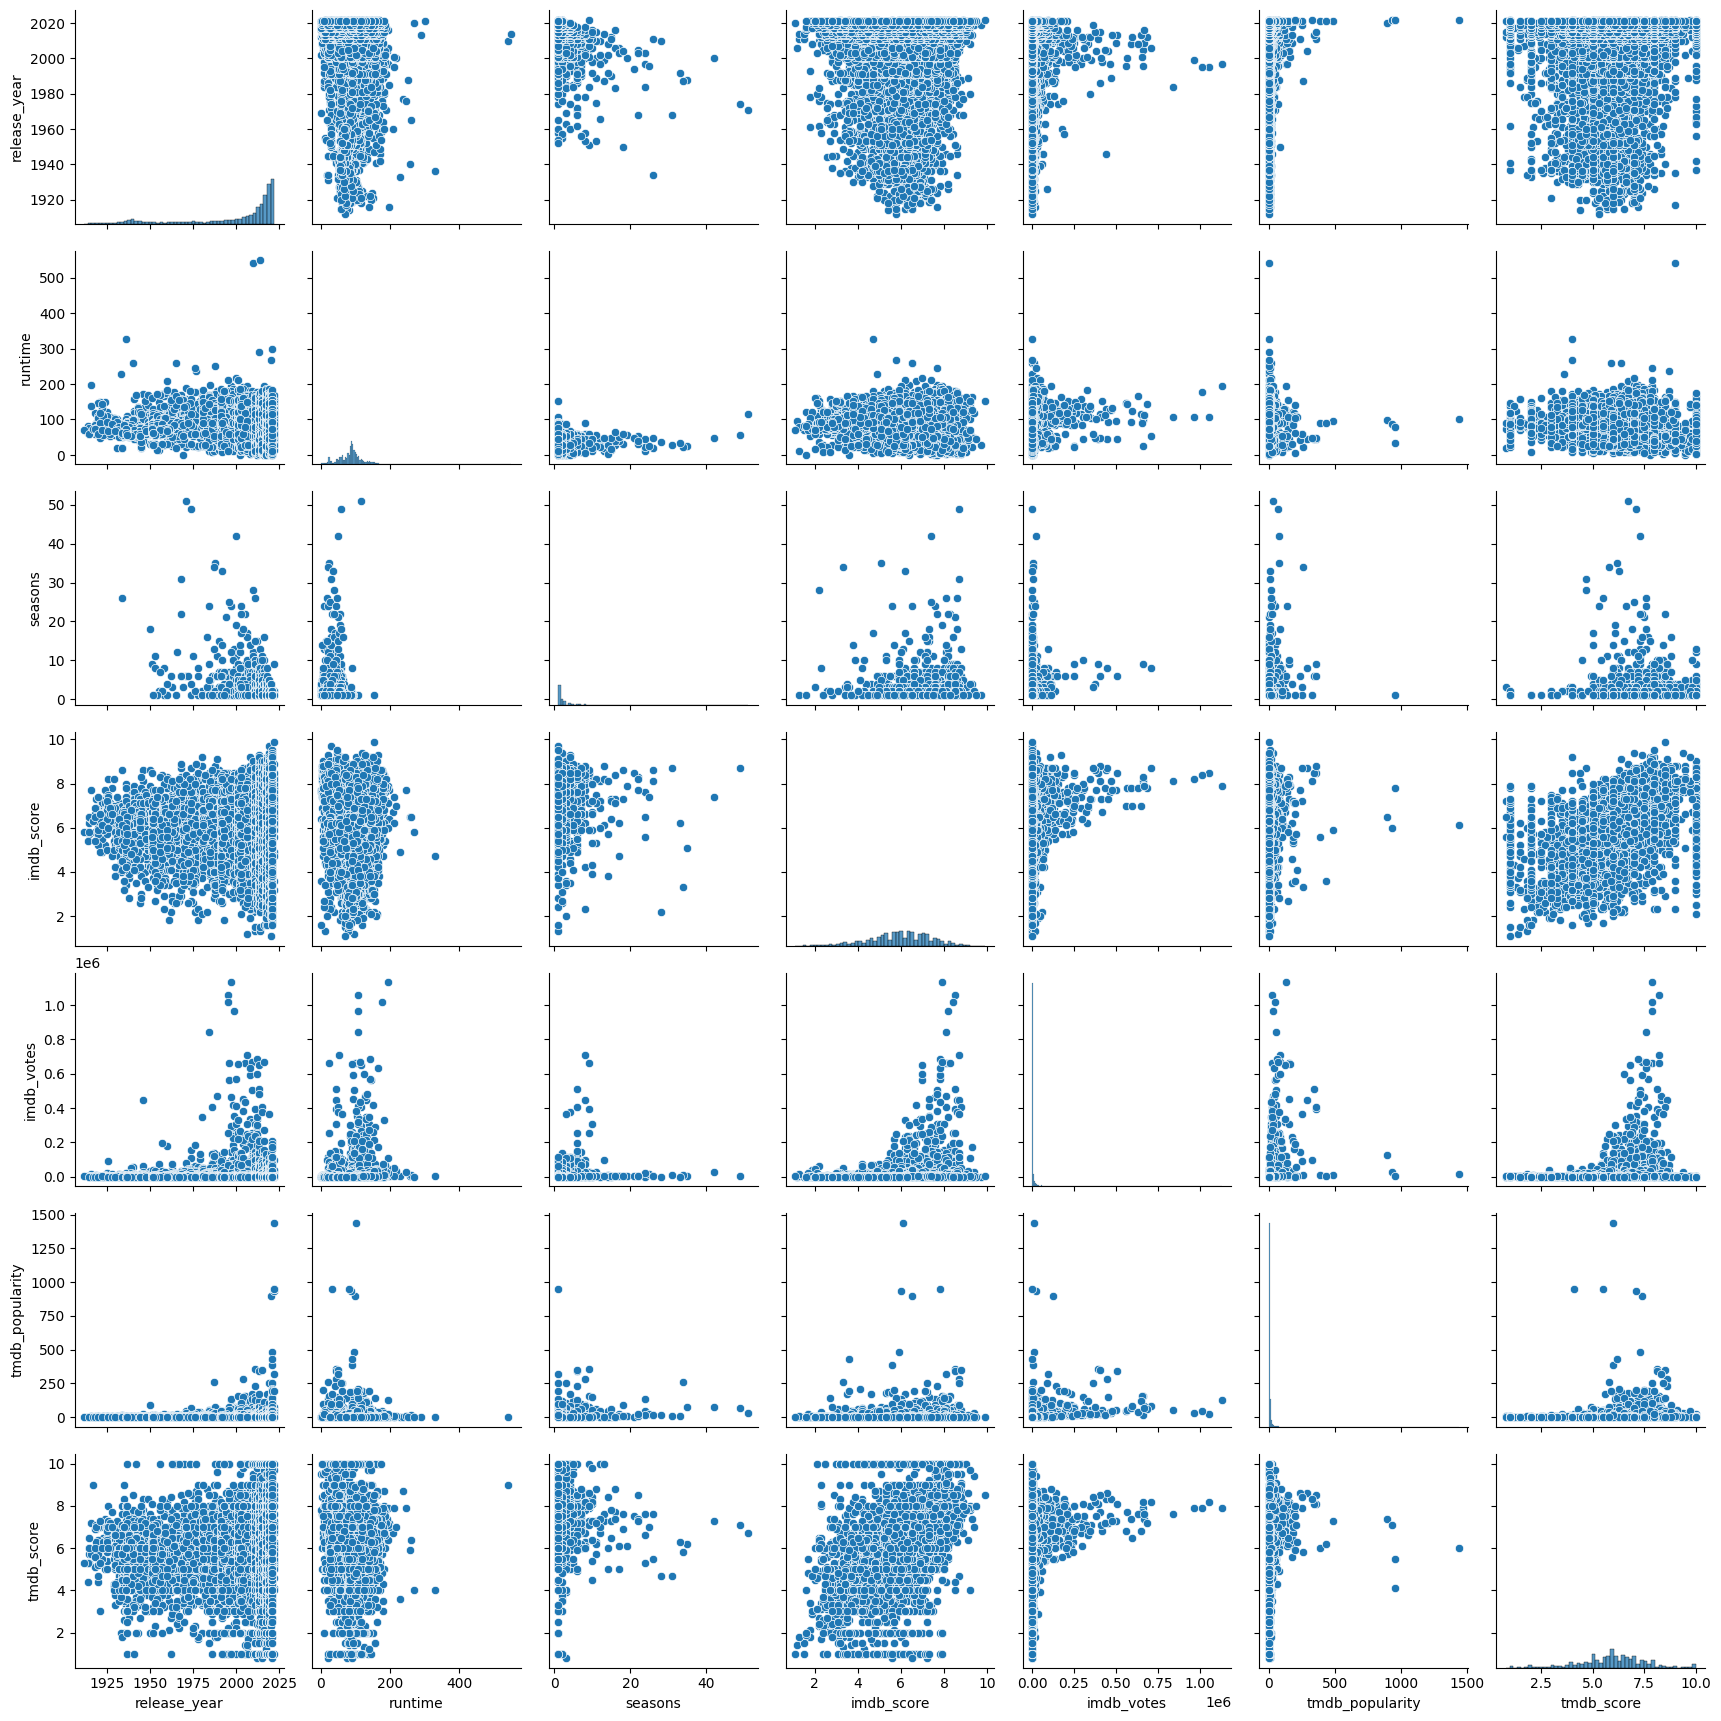

In [37]:
sns.pairplot(df2)
plt.show()

xix. Heatmap- This will help us visualise the correlation and patterns between different numeric values.

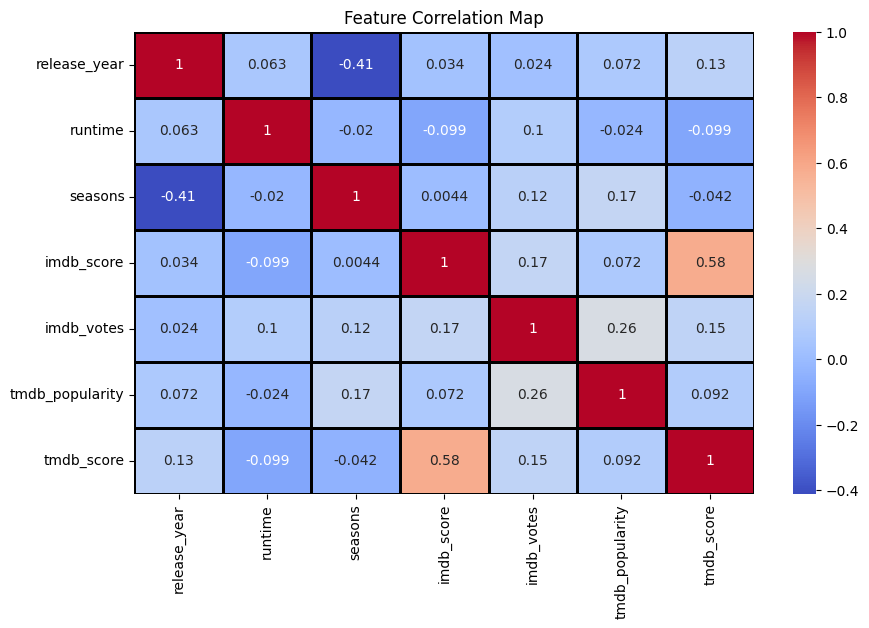

In [38]:
plt.figure(figsize=(10,6))
num_col=df2.select_dtypes(include=['int64','float64'])
corr=num_col.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=1,linecolor='black')
plt.title('Feature Correlation Map')
plt.show()

5. Conclusion

    In this analysis we found various trends and patterns across the features of this dataset. These trends and patterns provide us with valuable insights that we can use to implement changes that will benefit Amazon Prime in gaining more subscribers and thereby more viewership.
    
    Let's recap on those insights that we found from this analysis:

    - Movies dominate the content distribution of Amazon Prime library.
    - The movies/shows of the 21st century have a higher count in the library as compared to those of the 20th century.
    - R-rated movies/shows have the highest count, followed by movies/shows that are rated as Approved/Unrestricted.
    - Movies with a runtime of around 1 hour and 30 mins have the highest count.
    - Shows with episodes having a runtime of around 20-25 mins have the highest count.
    - Drama and Comedy content hold the first and second position in genre distribution.
    - US-based contents dominate the library followed by Indian-based contents.
    - Maximum amount of shows have only one season while the average being 2.34.
    - The average IMDb score for movies is 5.89.
    - The average TMDB score for movies is 5.90.
    - The average IMDb score for shows is 7.22.
    - The average TMDB score for shows is 7.28.
    - The popularity of shows have increased in the past few years.
    - The popularity of short films have increased in the past few years.
    - PG-rated movies performs the best on IMDb scores.
    - TV-PG rated shows perform the best on IMDb scores, followed by TV-MA rated shows.
    - R-rated and PG-13-rated movies/shows have increased since the 1960s.